<a href="https://colab.research.google.com/github/KhandareAshutosh/WhatsApp_Analysis/blob/main/WhatsApp_chat_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
pip install emoji --upgrade

In [99]:
import regex
import re
import pandas as pd
import numpy as np
import emoji
import seaborn as sns
from datetime import *
import datetime as dt
from matplotlib.ticker import MaxNLocator
from seaborn import *
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import *

In [100]:
def startsWithDateAndTime(s):
  pattern = r'^(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2})\s?(AM|PM|am|pm)? -'
  result = re.match(pattern, s)
  if result:
      return True
  return False

In [101]:
startsWithDateAndTime('24/07/2023, 10:15 am - You were added')

True

In [102]:
def FindAuthor(s):
  patterns = [
        r'(\w+):',                        # First Name
        r'(\w+\s+\w+):',                  # First Name + Last
        r'(\w+\s+\w+\s+\w+):',            # First Name + Middle Name + Last Name
        r'(\+\d{2} \d{5} \d{5}):',        # Mobile Number (India no.)
        r'(\+\d{2} \d{3} \d{3} \d{4}):',  # Mobile Number (US no.)
        r'(\w+)[\u263a-\U0001f999]+:',    # Name and Emoji
  ]
  pattern = '^' + '|'.join(patterns)
  result = re.match(pattern,s)
  if result:
    return True
  return False


In [103]:
# Extracting Date, Time, Author and message from the chat file.
def getDataPoint(line):
  splitLine = line.split(' - ')
  dateTime = splitLine[0]
  date, time = dateTime.split(', ')
  message = ' '.join(splitLine[1:])
  if FindAuthor(message):
    splitMessage = message.split(': ')
    author = splitMessage[0]
    message = ' '.join(splitMessage[1:])
  else:
    author = None
  return date, time, author, message

In [104]:
# Finally creating a dataframe and storing all data inside that dataframe
parsedData = [] # List to keep track of data so it can be a Pandas dataframe
# Uploading exported chat file
conversation  = '/content/drive/MyDrive/WhatsApp chat Analysis/WhatsApp Chat.txt'
with open(conversation, encoding = "utf-8") as fp:
  fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
  messageBuffer = []
  date, time, author = None, None, None
  while True:
    line = fp.readline()
    if not line:
      break
    line = line.strip()
    #print(line)
    if startsWithDateAndTime(line):
      if len(messageBuffer) > 0:
        #print(messageBuffer)
        parsedData.append([date, time, author, ' '.join(messageBuffer)])
      messageBuffer.clear()
      date, time, author, message = getDataPoint(line)
      messageBuffer.append(message)
    else:
      messageBuffer.append(line)

#print(parsedData)
df = pd.DataFrame(parsedData, columns = ['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
#print(df)
df.tail(20)

<ipython-input-104-18bf2fd0604b>:27: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])


,Date,Time,Author,Message
629,2023-07-08,10:56 pm,+91 80800 58069,Kya ho gaya brdr?
630,2023-07-08,10:57 pm,+91 92849 67851,Companies laa bhai tu jaake
631,2023-07-08,10:57 pm,Ajinkya Bobde,😂😂
632,2023-07-08,10:57 pm,+91 90823 73993,👀
633,2023-07-08,10:57 pm,Prasenjit Darole,Too much work
634,2023-07-08,10:57 pm,None,Chaitanya (CL): Aagaya. Tu bhi bhai laa company.😂
635,2023-07-08,10:57 pm,+91 90823 73993,Ho gaya mera
636,2023-07-08,10:59 pm,+91 98702 54454,abey laude tu soja
637,2023-07-08,10:59 pm,+91 98702 54454,aankh nikaalde apne
638,2023-07-08,10:59 pm,None,Chaitanya (CL): <Media omitted>


In [105]:
# Checking shape of dataset
df.shape

# Checking info
df.info()

# Checking number of null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     649 non-null    datetime64[ns]
 1   Time     649 non-null    object        
 2   Author   463 non-null    object        
 3   Message  649 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 20.4+ KB


Date         0
Time         0
Author     186
Message      0
dtype: int64

In [106]:
# Checking head and tail of dataset
df.head(20)

df.tail(20)

,Date,Time,Author,Message
629,2023-07-08,10:56 pm,+91 80800 58069,Kya ho gaya brdr?
630,2023-07-08,10:57 pm,+91 92849 67851,Companies laa bhai tu jaake
631,2023-07-08,10:57 pm,Ajinkya Bobde,😂😂
632,2023-07-08,10:57 pm,+91 90823 73993,👀
633,2023-07-08,10:57 pm,Prasenjit Darole,Too much work
634,2023-07-08,10:57 pm,None,Chaitanya (CL): Aagaya. Tu bhi bhai laa company.😂
635,2023-07-08,10:57 pm,+91 90823 73993,Ho gaya mera
636,2023-07-08,10:59 pm,+91 98702 54454,abey laude tu soja
637,2023-07-08,10:59 pm,+91 98702 54454,aankh nikaalde apne
638,2023-07-08,10:59 pm,None,Chaitanya (CL): <Media omitted>


In [107]:
# Droping Nan values
df = df.dropna()
df = df.reset_index(drop = True)
df.shape

(463, 4)

In [108]:
# Number of authors
df['Author'].nunique()

123

In [109]:
# Checking authors of group
df['Author'].unique()

array(['+91 81306 82479', '+91 90820 54402', '+91 77382 72594',
       '+91 93283 67256', '+91 84345 63880', '+91 98370 25557',
       '+91 78690 31079', 'Yashwant Singh', '+91 85870 91003',
       '+91 88550 35637', 'Parth Dani', '+91 84828 65324',
       '+91 99204 13458', 'Karan Bayad', '+91 84088 81022',
       '+91 84463 01109', '+91 94805 68073', '+91 96193 06774',
       '+91 95301 57012', '+91 96494 30433', '+91 80800 58069',
       '+91 91754 18951', '+91 90823 73993', '+91 91670 02488',
       '+91 96383 64485', '+91 97019 05345', '+91 99870 50893',
       '+91 72081 38669', '+91 70457 25332', '+91 91480 96854',
       '+91 96760 21163', '+91 87672 76472', '+91 89050 78056',
       'Divij Goyal', '+91 90336 68821', '+91 76710 51595',
       'Atharwa Gade CL', '+91 96076 91654', '+91 89623 30664',
       'Adit Agrawal 2', '+91 97734 06477', '+91 87925 89747',
       '+91 73570 22913', '+91 90821 50221', '+91 99771 22771',
       'Pratik Nimje', '+91 99962 74424', '+91 76948 96

In [110]:
# Adding one more column of "Day" for better analysis, here we use datetime library which help us to do this task easily.

weeks = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}
df['Day'] = df['Date'].dt.weekday.map(weeks)

# Rearranging the columns
df = df[['Date','Day', 'Time', 'Author', 'Message']]

# Changing the datatype of collumn "Day"
df['Day'] = df['Day'].astype('category')

# New Dataset
df.head()

,Date,Day,Time,Author,Message
0,2023-07-24,Monday,10:27 pm,+91 81306 82479,Kitne floors chale gaye?
1,2023-07-24,Monday,10:32 pm,+91 90820 54402,Floor udhar hi hai
2,2023-07-24,Monday,10:32 pm,+91 90820 54402,Room gaye
3,2023-07-24,Monday,10:33 pm,+91 77382 72594,Room bhi udhar hi...
4,2023-07-24,Monday,10:33 pm,+91 93283 67256,To gaya kya?


In [111]:
# Counting number of letters in each message
df["Letters"] = df['Message'].apply(lambda s : len(s))

# Counting number of words in each message
df['Words'] = df['Message'].apply(lambda s: len(s.split(' ')))

# Function to count number of links in dataset, it will add extra column and store information in it.
URLPATTERN = r'(https?://S+)'
df['Url_Count'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.Url_Count)

# Function to count number of media
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.Message.apply(lambda x: re.findall(MEDIAPATTERN,x)).str.len()
media = np.sum(df.Media_Count)

# New updated dataset
df

,Date,Day,Time,Author,Message,Letters,Words,Url_Count,Media_Count
0,2023-07-24,Monday,10:27 pm,+91 81306 82479,Kitne floors chale gaye?,24,4,0,0
1,2023-07-24,Monday,10:32 pm,+91 90820 54402,Floor udhar hi hai,18,4,0,0
2,2023-07-24,Monday,10:32 pm,+91 90820 54402,Room gaye,9,2,0,0
3,2023-07-24,Monday,10:33 pm,+91 77382 72594,Room bhi udhar hi...,20,4,0,0
4,2023-07-24,Monday,10:33 pm,+91 93283 67256,To gaya kya?,12,3,0,0
...,...,...,...,...,...,...,...,...,...
458,2023-07-08,Saturday,11:07 pm,+91 82898 18770,"saale harami, credits deke bhej",31,5,0,0
459,2023-07-08,Saturday,11:10 pm,+91 87705 34812,‎3 contacts.vcf (file attached),31,4,0,0
460,2023-07-08,Saturday,11:10 pm,+91 87705 34812,Can someone add him please,26,5,0,0
461,2023-07-08,Saturday,11:27 pm,+91 99878 94251,lan down?,9,2,0,0


In [112]:
# Basic statistics from data
total_messages = df.shape[0]
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
links = np.sum(df.Url_Count)
print('Group Chatting Stats: ')
print('Total number of messages: {}'.format(total_messages))
print('Total number of media messages: {}'.format(media_messages))
print('Total number of links: {}'.format(links))

Group Chatting Stats: 
Total number of messages: 463
Total number of media messages: 20
Total number of links: 0


In [114]:
# Basic stats of each user
l = df.Author.unique()
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]

  # req_df will contain messages of only the particular usage
  print(f'--> Stats of {l[i]} <--')

  # shape will print the number of rows which will indirectly means the number of messages
  print('Total messages sent: ', req_df.shape[0])

  # Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Words']))/req_df.shape[0]
  w_p_m = ("%.3f"% round(words_per_message,2))
  print('Average Words per message: ', w_p_m)

  # media consists of media messages
  media = sum(req_df["Media_Count"])
  print('Total media messages sent: ', media)

  # Links consist of total links
  links = sum(req_df["Url_Count"])
  print('Total links sent: ', links)
  print()
  print('-----------------------------------------------------------------------------------------------')


--> Stats of +91 81306 82479 <--
Total messages sent:  3
Average Words per message:  4.000
Total media messages sent:  0
Total links sent:  0

-----------------------------------------------------------------------------------------------
--> Stats of +91 90820 54402 <--
Total messages sent:  9
Average Words per message:  43.220
Total media messages sent:  6
Total links sent:  0

-----------------------------------------------------------------------------------------------
--> Stats of +91 77382 72594 <--
Total messages sent:  7
Average Words per message:  7.290
Total media messages sent:  0
Total links sent:  0

-----------------------------------------------------------------------------------------------
--> Stats of +91 93283 67256 <--
Total messages sent:  12
Average Words per message:  8.830
Total media messages sent:  0
Total links sent:  0

-----------------------------------------------------------------------------------------------
--> Stats of +91 84345 63880 <--
Total mes

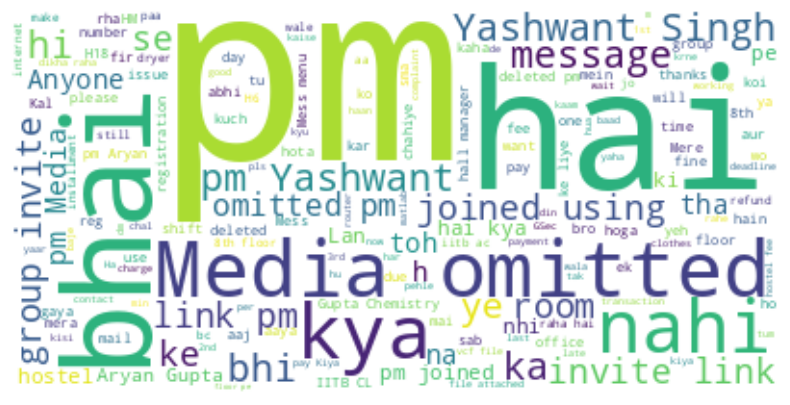

In [115]:
# Creating a word cloud of most used words
# Word Could of mostly used word in the group
text = " ".join(review for review in df.Message)
wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white").generate(text)

# Display the generated image
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [117]:
# Total number of messages sent by each user

l = df.Author.unique()
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]

  # req_df will contain messages of only the particular usage
  print(l[i], '  ->  ', req_df.shape[0])

+91 81306 82479   ->   3
+91 90820 54402   ->   9
+91 77382 72594   ->   7
+91 93283 67256   ->   12
+91 84345 63880   ->   2
+91 98370 25557   ->   16
+91 78690 31079   ->   2
Yashwant Singh   ->   18
+91 85870 91003   ->   5
+91 88550 35637   ->   4
Parth Dani   ->   12
+91 84828 65324   ->   2
+91 99204 13458   ->   13
Karan Bayad   ->   1
+91 84088 81022   ->   2
+91 84463 01109   ->   8
+91 94805 68073   ->   1
+91 96193 06774   ->   3
+91 95301 57012   ->   1
+91 96494 30433   ->   4
+91 80800 58069   ->   19
+91 91754 18951   ->   3
+91 90823 73993   ->   4
+91 91670 02488   ->   14
+91 96383 64485   ->   12
+91 97019 05345   ->   11
+91 99870 50893   ->   1
+91 72081 38669   ->   1
+91 70457 25332   ->   2
+91 91480 96854   ->   3
+91 96760 21163   ->   2
+91 87672 76472   ->   1
+91 89050 78056   ->   3
Divij Goyal   ->   8
+91 90336 68821   ->   7
+91 76710 51595   ->   1
Atharwa Gade CL   ->   2
+91 96076 91654   ->   2
+91 89623 30664   ->   1
Adit Agrawal 2   ->   2
+91 97

In [118]:
# Total messages sent on each day of the week
l = df.Day.unique()
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df = df[df["Day"]== l[i]]
  # req_df will contain messages of only one particular user
  print(l[i], '  ->  ', req_df.shape[0])

Monday   ->   64
Tuesday   ->   96
Wednesday   ->   27
Thursday   ->   13
Friday   ->   57
Saturday   ->   145
Sunday   ->   61
